In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt   
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix,plot_confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import metrics,model_selection
from sklearn.preprocessing import scale
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import os

In [3]:
os.chdir("C:\\Users\\91951\\Desktop\\Greatlearning\\Unit 5 - Predictive Modeling\\Project")

In [4]:
df = pd.read_csv('Holiday_Package.csv')

**Problem Statement:**

You are hired by a tour and travel agency which deals in selling holiday packages. You are provided details of 872 employees of a company. Among these employees, some opted for the package and some didn't. You have to help the company in predicting whether an employee will opt for the package or not on the basis of the information given in the data set. Also, find out the important factors on the basis of which the company will focus on particular employees to sell their packages.

Dataset for Problem 2: Holiday_Package.csv

### Question - 2.1. Data Ingestion: Read the dataset. Do the descriptive statistics and do null value condition check, write an inference on it. Perform Univariate and Bivariate Analysis. Do exploratory data analysis.

In [5]:
df.head(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412,30,8,1,1,no
1,2,yes,37207,45,8,0,1,no
2,3,no,58022,46,9,0,0,no
3,4,no,66503,31,11,2,0,no
4,5,no,66734,44,12,0,2,no
5,6,yes,61590,42,12,0,1,no
6,7,no,94344,51,8,0,0,no
7,8,yes,35987,32,8,0,2,no
8,9,no,41140,39,12,0,0,no
9,10,no,35826,43,11,0,2,no


In [6]:
df.tail(10)

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
862,863,no,66900,35,10,1,1,yes
863,864,no,35290,51,9,0,1,yes
864,865,no,25527,41,5,1,0,yes
865,866,yes,44057,35,9,0,2,yes
866,867,yes,22643,42,14,0,0,yes
867,868,no,40030,24,4,2,1,yes
868,869,yes,32137,48,8,0,0,yes
869,870,no,25178,24,6,2,0,yes
870,871,yes,55958,41,10,0,1,yes
871,872,no,74659,51,10,0,0,yes


In [7]:
df.shape

(872, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Unnamed: 0         872 non-null    int64 
 1   Holliday_Package   872 non-null    object
 2   Salary             872 non-null    int64 
 3   age                872 non-null    int64 
 4   educ               872 non-null    int64 
 5   no_young_children  872 non-null    int64 
 6   no_older_children  872 non-null    int64 
 7   foreign            872 non-null    object
dtypes: int64(6), object(2)
memory usage: 54.6+ KB


In [9]:
#Calculating basic statistical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,872.0,436.500000,251.869014,1.0,218.75,436.5,654.25,872.0
Salary,872.0,47729.172018,23418.668531,1322.0,35324.00,41903.5,53469.50,236961.0
age,872.0,39.955275,10.551675,20.0,32.00,39.0,48.00,62.0
educ,872.0,9.307339,3.036259,1.0,8.00,9.0,12.00,21.0
no_young_children,872.0,0.311927,0.612870,0.0,0.00,0.0,0.00,3.0
no_older_children,872.0,0.982798,1.086786,0.0,0.00,1.0,2.00,6.0


In [10]:
#Calculating basic statistical data including all information\
df.describe(include = "all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,872,NaN,NaN,NaN,436.5,251.869,1,218.75,436.5,654.25,872
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
#Checking Null Value
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [12]:
#Checking duplicates in data
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [13]:
#Finding unique values for categorical variables
for column in df.columns:
    if df[column].dtype == 'object':
        print(column.upper(),': ',df[column].nunique())
        print(df[column].value_counts().sort_values())
        print('\n')

HOLLIDAY_PACKAGE :  2
yes    401
no     471
Name: Holliday_Package, dtype: int64


FOREIGN :  2
yes    216
no     656
Name: foreign, dtype: int64




In [14]:
df.Holliday_Package.value_counts(1)

no     0.540138
yes    0.459862
Name: Holliday_Package, dtype: float64

### Performing univariate and bivariate analysis

Text(0.5, 1.0, 'no_older_children Distribution')

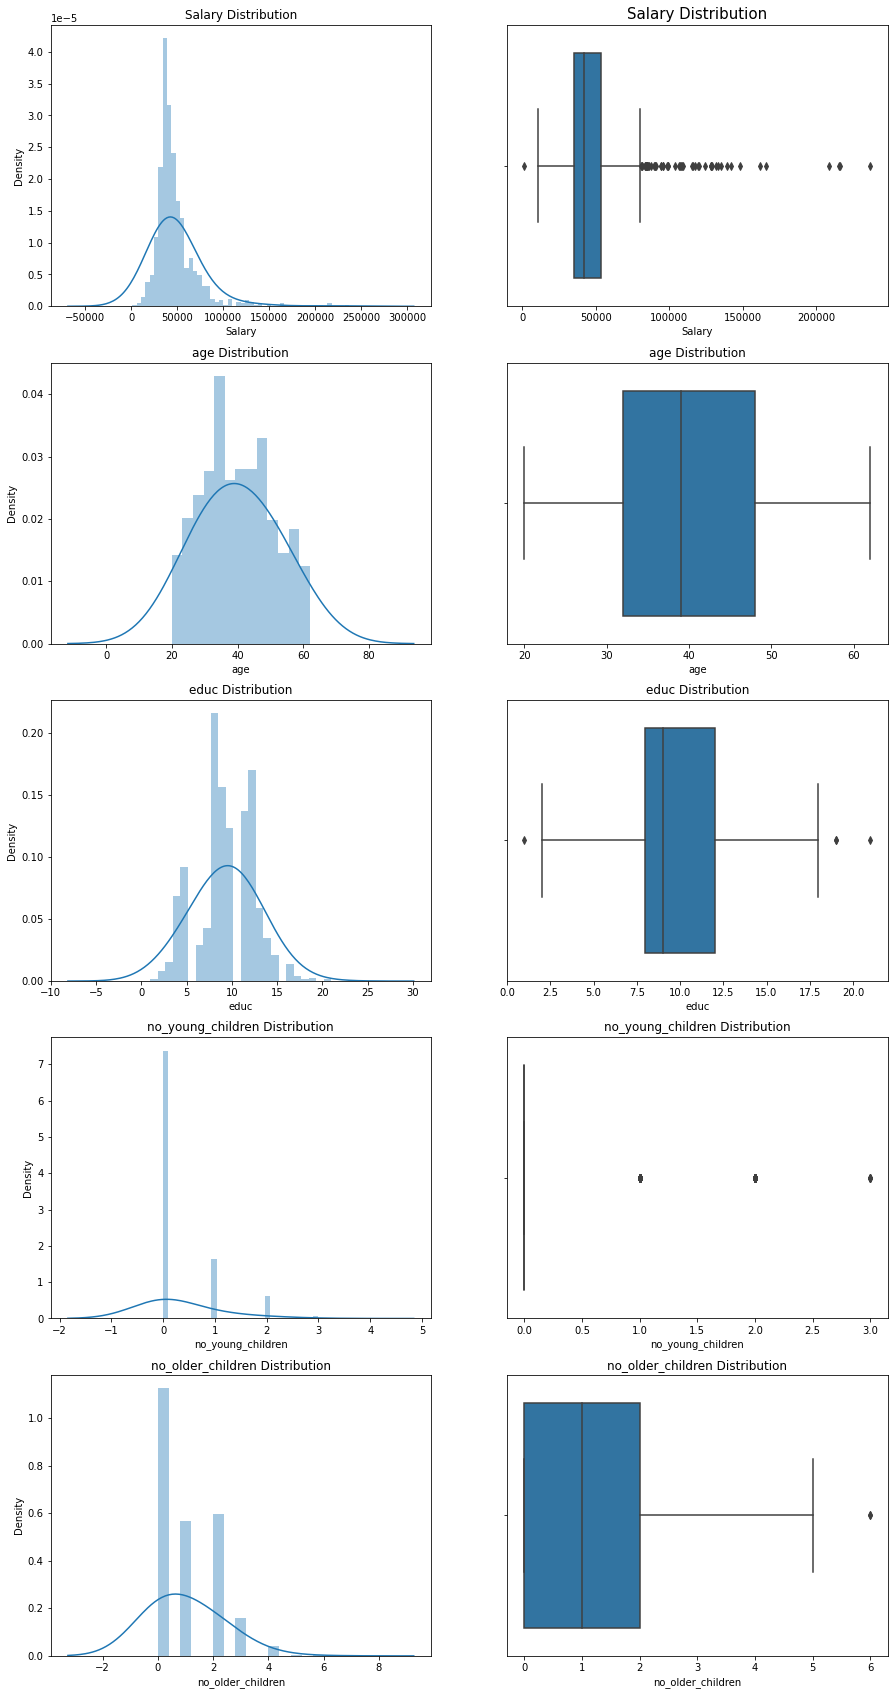

In [15]:
fig, axes = plt.subplots(nrows=5,ncols=2)
fig.set_size_inches(15, 30)

a = sns.distplot(df['Salary'], kde_kws = {'bw' : 1}, ax=axes[0][0])
a.set_title("Salary Distribution",fontsize=12)

a = sns.boxplot(df['Salary'] , orient = "v" , ax=axes[0][1])
a.set_title("Salary Distribution",fontsize=15)

a = sns.distplot(df['age'], kde_kws = {'bw' : 1}, ax=axes[1][0])
a.set_title("age Distribution",fontsize=12)

a = sns.boxplot(df['age'] , orient = "v" , ax=axes[1][1])
a.set_title("age Distribution",fontsize=12)

a = sns.distplot(df['educ'],  kde_kws = {'bw' : 1}, ax=axes[2][0])
a.set_title("educ Distribution",fontsize=12)

a = sns.boxplot(df['educ'] , orient = "v" , ax=axes[2][1])
a.set_title("educ Distribution",fontsize=12)

a = sns.distplot(df['no_young_children'],  kde_kws = {'bw' : 1}, ax=axes[3][0])
a.set_title("no_young_children Distribution",fontsize=12)

a = sns.boxplot(df['no_young_children'] , orient = "v" , ax=axes[3][1])
a.set_title("no_young_children Distribution",fontsize=12)

a = sns.distplot(df['no_older_children'], kde_kws = {'bw' : 1}, ax=axes[4][0])
a.set_title("no_older_children Distribution",fontsize=12)

a = sns.boxplot(df['no_older_children'] , orient = "v" , ax=axes[4][1])
a.set_title("no_older_children Distribution",fontsize=12)

In [16]:
#Measuring the skewness
df.skew()

Unnamed: 0           0.000000
Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

### Graphs on categorical variables

<AxesSubplot:xlabel='Holliday_Package', ylabel='count'>

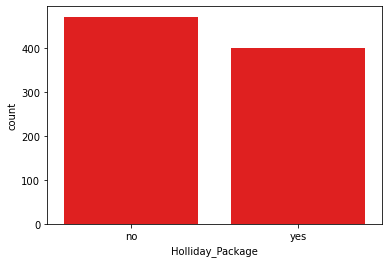

In [17]:
sns.countplot(x="Holliday_Package", data=df, color="red")

<AxesSubplot:xlabel='foreign', ylabel='count'>

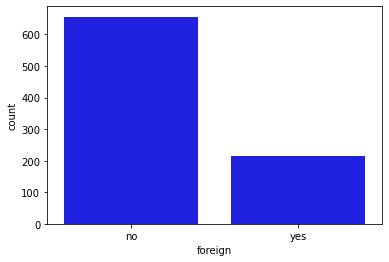

In [18]:
sns.countplot(x="foreign", data=df, color="blue")

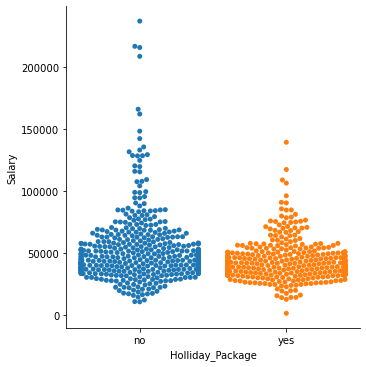

In [19]:
sns.catplot(x="Holliday_Package", y="Salary",kind="swarm",data=df)

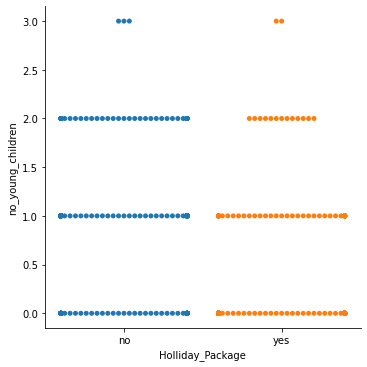

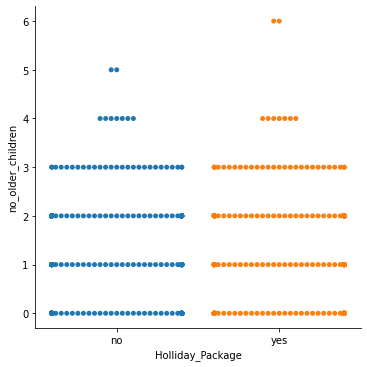

In [20]:
sns.catplot(x="Holliday_Package", y="no_young_children",kind="swarm",data=df)
sns.catplot(x="Holliday_Package", y="no_older_children",kind="swarm",data=df)

<AxesSubplot:xlabel='no_young_children', ylabel='age'>

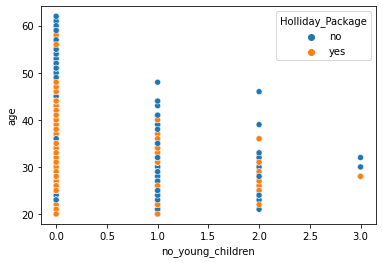

In [21]:
sns.scatterplot(data = df, x='no_young_children',y='age', hue = 'Holliday_Package')

<AxesSubplot:xlabel='no_older_children', ylabel='age'>

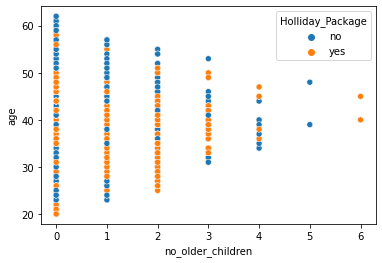

In [22]:
sns.scatterplot(data = df, x='no_older_children',y='age', hue = 'Holliday_Package')

<AxesSubplot:xlabel='age', ylabel='Salary'>

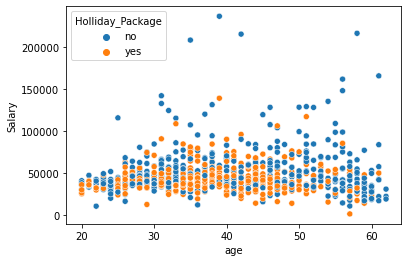

In [23]:
sns.scatterplot(data = df, x='age',y='Salary', hue = 'Holliday_Package')

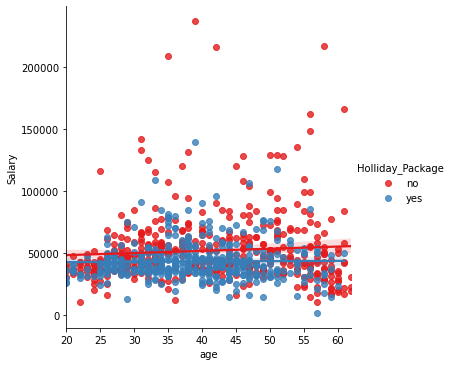

In [24]:
sns.lmplot(x="age", y="Salary", hue="Holliday_Package", data=df,
               palette="Set1")

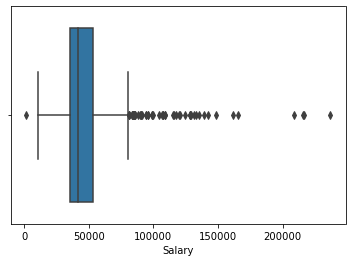

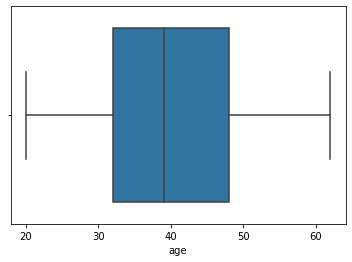

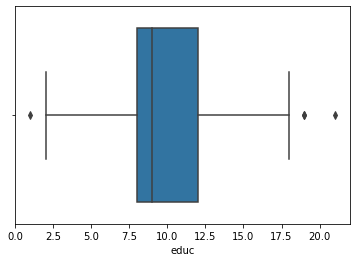

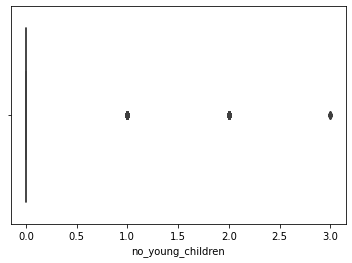

<AxesSubplot:xlabel='no_older_children'>

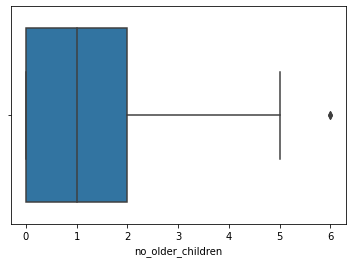

In [25]:
sns.boxplot(x='Salary', data=df)
plt.show()
sns.boxplot(x='age', data=df)
plt.show()
sns.boxplot(x='educ', data=df)
plt.show()
sns.boxplot(x='no_young_children', data=df)
plt.show()
sns.boxplot(x='no_older_children', data=df)

**Observation from the boxplots**
- Outlier found in following columns - Salary, age, educ, no_young_children, no_older_children
- Outlier treatment is required

<function matplotlib.pyplot.show(close=None, block=None)>

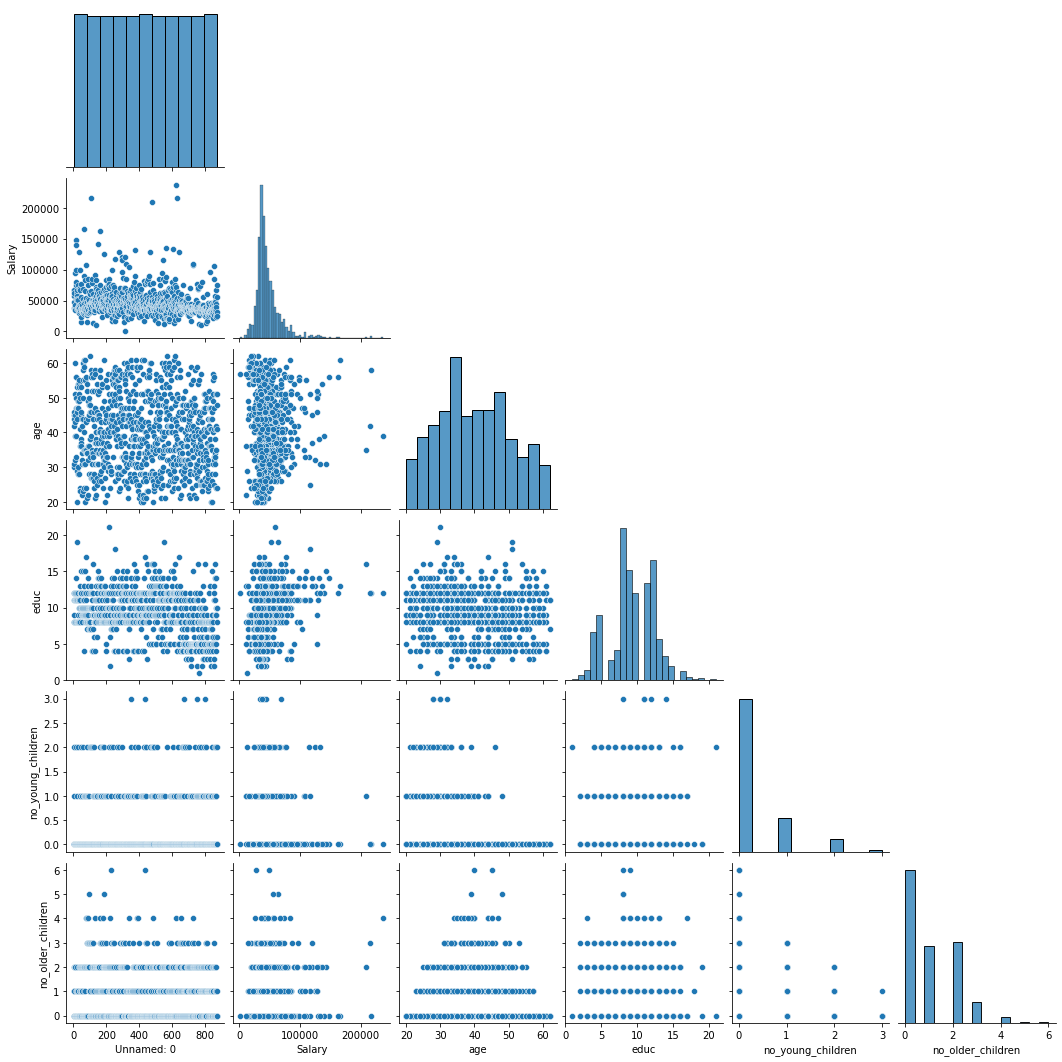

In [26]:
#Pairplot to display data distribution
sns.pairplot(df,corner=True)
plt.show

**Checking Correlation**

In [27]:
df.corr().T

,Unnamed: 0,Salary,age,educ,no_young_children,no_older_children
Unnamed: 0,1.000000,-0.193249,-0.103782,-0.296015,0.052146,-0.025852
Salary,-0.193249,1.000000,0.071709,0.326540,-0.029664,0.113772
age,-0.103782,0.071709,1.000000,-0.149294,-0.519093,-0.116205
educ,-0.296015,0.326540,-0.149294,1.000000,0.098350,-0.036321
no_young_children,0.052146,-0.029664,-0.519093,0.098350,1.000000,-0.238428
no_older_children,-0.025852,0.113772,-0.116205,-0.036321,-0.238428,1.000000


In [28]:
df.isnull().sum()

Unnamed: 0           0
Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

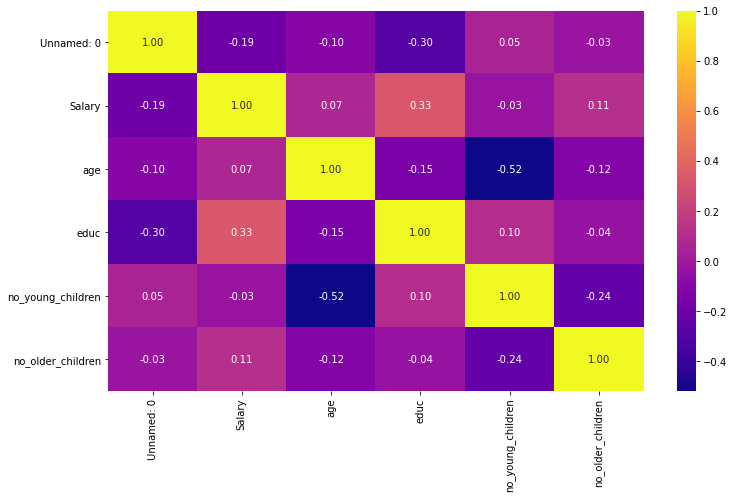

In [29]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True,fmt = '.2f',cmap='plasma')
plt.show()

**Outlier Treatment**

In [30]:
#capping technique
def remove_out(xyz):
    sorted(xyz)
    Q1,Q3 = xyz.quantile([0.25,0.75])
    IQR = Q3-Q1
    lower_range = Q1 - (1.5*IQR)
    upper_range = Q3 + (1.5*IQR)
    return lower_range, upper_range

In [31]:
lrsalary,ursalary = remove_out(df['Salary'])
df['Salary'] = np.where(df['Salary'] > ursalary,ursalary,df['Salary'])
df['Salary'] = np.where(df['Salary'] < lrsalary,lrsalary,df['Salary'])

In [32]:
lrage,urage = remove_out(df['age'])
df['age'] = np.where(df['age'] > urage,urage,df['age'])
df['age'] = np.where(df['age'] < lrage,lrage,df['age'])

In [33]:
lreduc,ureduc = remove_out(df['educ'])
df['educ'] = np.where(df['educ'] > ureduc,ureduc,df['educ'])
df['educ'] = np.where(df['educ'] < lreduc,lreduc,df['educ'])

In [34]:
lrnoyoungchildren,urnoyoungchildren = remove_out(df['no_young_children'])
df['no_young_children'] = np.where(df['no_young_children'] > urnoyoungchildren,urnoyoungchildren,df['no_young_children'])
df['no_young_children'] = np.where(df['no_young_children'] < lrnoyoungchildren,lrnoyoungchildren,df['no_young_children'])

In [35]:
lrnoolderchildren,urnoolderchildren = remove_out(df['no_older_children'])
df['no_older_children'] = np.where(df['no_older_children'] > urnoolderchildren,urnoolderchildren,df['no_older_children'])
df['no_older_children'] = np.where(df['no_older_children'] < lrnoolderchildren,lrnoolderchildren,df['no_older_children'])

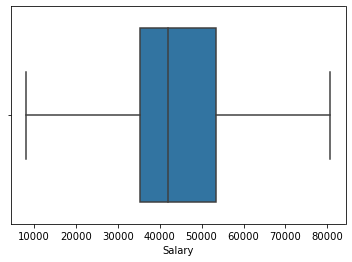

In [36]:
sns.boxplot(x='Salary', data=df)
plt.show()

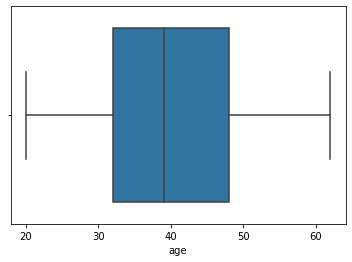

In [37]:
sns.boxplot(x='age', data=df)
plt.show()

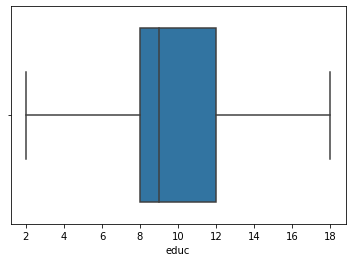

In [38]:
sns.boxplot(x='educ', data=df)
plt.show()

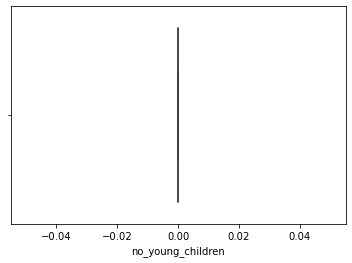

In [39]:
sns.boxplot(x='no_young_children', data=df)
plt.show()

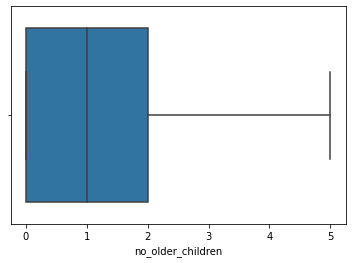

In [40]:
sns.boxplot(x='no_older_children', data=df)
plt.show()

In [41]:
df.head()

,Unnamed: 0,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,1,no,48412.0,30.0,8.0,0.0,1.0,no
1,2,yes,37207.0,45.0,8.0,0.0,1.0,no
2,3,no,58022.0,46.0,9.0,0.0,0.0,no
3,4,no,66503.0,31.0,11.0,0.0,0.0,no
4,5,no,66734.0,44.0,12.0,0.0,2.0,no


In [42]:
# dropping the id column (Unnamed)
df1 = df.drop(columns=['Unnamed: 0'], axis=1)

In [43]:
df1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


In [44]:
df2 = df1.copy()


### Question - 2.2. Do not scale the data. Encode the data (having string values) for Modelling. Data Split: Split the data into train and test (70:30). Apply Logistic Regression and LDA (linear discriminant analysis).

### Question - 2.3. Performance Metrics: Check the performance of Predictions on Train and Test sets using Accuracy, Confusion Matrix, Plot ROC curve and get ROC_AUC score for each model Final Model: Compare Both the models and write inference which model is best/optimized.

**Step 1: Convert categorical to dummy variables in data**

In [48]:
data_df = pd.get_dummies(df2, columns=['Holliday_Package','foreign'], drop_first = True)

In [49]:
data_df.head()

,Salary,age,educ,no_young_children,no_older_children,Holliday_Package_yes,foreign_yes
0,48412.0,30.0,8.0,0.0,1.0,0,0
1,37207.0,45.0,8.0,0.0,1.0,1,0
2,58022.0,46.0,9.0,0.0,0.0,0,0
3,66503.0,31.0,11.0,0.0,0.0,0,0
4,66734.0,44.0,12.0,0.0,2.0,0,0


In [50]:
data_df.columns

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children',
       'Holliday_Package_yes', 'foreign_yes'],
      dtype='object')

**Step 2: Data Split: Split the data into train and test (70:30).**

In [51]:
X = data.drop('Holliday_Package_yes', axis=1)
y = data['Holliday_Package_yes']

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1,stratify=y)

In [53]:
y_train.value_counts(1)

0    0.539344
1    0.460656
Name: Holliday_Package_yes, dtype: float64

**Step 3: Logistic Regression Model**

In [54]:
#Applying GridSearchCV
grid={'penalty':['l1','l2','none'],
      'solver':['lbfgs', 'liblinear'],
      'tol':[0.0001,0.000001]}

In [55]:
model = LogisticRegression(max_iter=100000,n_jobs=2)

In [56]:
grid_search = GridSearchCV(estimator = model, param_grid = grid, cv = 3,n_jobs=-1,scoring='f1')

In [57]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=100000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l1', 'l2', 'none'],
                         'solver': ['lbfgs', 'liblinear'],
                         'tol': [0.0001, 1e-06]},
             scoring='f1')

In [58]:
print(grid_search.best_params_,'\n')
print(grid_search.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-06} 

LogisticRegression(max_iter=100000, n_jobs=2, solver='liblinear', tol=1e-06)


In [59]:
best_model = grid_search.best_estimator_

In [63]:
# Prediction on the training set

ytrain_predict = best_model.predict(X_train)
ytrain_predict

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [62]:
# Prediction on the test set

ytest_predict = best_model.predict(X_test)
ytest_predict

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=uint8)

In [64]:
#Probabilities on the test set

ytest_predict_prob=best_model.predict_proba(X_test)
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.636523,0.363477
1,0.576651,0.423349
2,0.650835,0.349165
3,0.568064,0.431936
4,0.536356,0.463644


**Confusion Matrix**

              precision    recall  f1-score   support

           0       0.63      0.79      0.70       329
           1       0.65      0.45      0.53       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.62       610
weighted avg       0.64      0.63      0.62       610
 



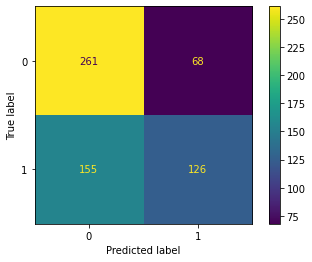

In [65]:
#Confusion matrix on the training data

plot_confusion_matrix(best_model,X_train,y_train)
print(classification_report(y_train, ytrain_predict),'\n');

              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262
 



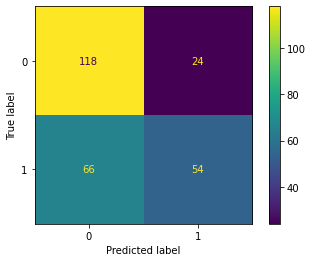

In [66]:
#Confusion matrix on the test data

plot_confusion_matrix(best_model,X_test,y_test)
print(classification_report(y_test, ytest_predict),'\n');

**Accuracy and AUC & ROC Curve**

In [67]:
#Accuracy of the training Data

lr_train_acc = best_model.score(X_train, y_train)
lr_train_acc

0.6344262295081967

AUC: 0.661


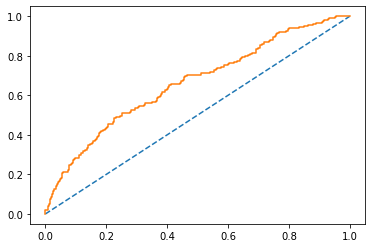

In [68]:
#AUC and ROC for the training data
probs = best_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_train_auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % lr_train_auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);

In [69]:
#Accuracy of the test Data

lr_test_acc = best_model.score(X_test, y_test)
lr_test_acc

0.6564885496183206

AUC: 0.675


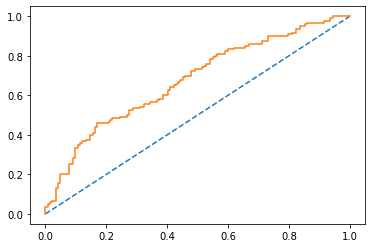

In [70]:
#AUC and ROC for the test data

# predict probabilities
probs = best_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
lr_test_auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % lr_test_auc)
# calculate roc curve
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(test_fpr, test_tpr);

### Linear Discriminant Analysis (LDA) Model

In [71]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872 entries, 0 to 871
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Holliday_Package   872 non-null    object 
 1   Salary             872 non-null    float64
 2   age                872 non-null    float64
 3   educ               872 non-null    float64
 4   no_young_children  872 non-null    float64
 5   no_older_children  872 non-null    float64
 6   foreign            872 non-null    object 
dtypes: float64(5), object(2)
memory usage: 47.8+ KB


In [72]:
for feature in df1.columns: 
    if df1[feature].dtype == 'object': 
        print('\n')
        print('feature:',feature)
        print(pd.Categorical(df1[feature].unique()))
        print(pd.Categorical(df1[feature].unique()).codes)
        df1[feature] = pd.Categorical(df1[feature]).codes



feature: Holliday_Package
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


feature: foreign
['no', 'yes']
Categories (2, object): ['no', 'yes']
[0 1]


In [74]:
df1.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
0,0,48412.00,30.0,8.0,0.0,1.0,0
1,1,37207.00,45.0,8.0,0.0,1.0,0
2,0,58022.00,46.0,9.0,0.0,0.0,0
3,0,66503.00,31.0,11.0,0.0,0.0,0
4,0,66734.00,44.0,12.0,0.0,2.0,0
5,1,61590.00,42.0,12.0,0.0,1.0,0
6,0,80687.75,51.0,8.0,0.0,0.0,0
7,1,35987.00,32.0,8.0,0.0,2.0,0
8,0,41140.00,39.0,12.0,0.0,0.0,0
9,0,35826.00,43.0,11.0,0.0,2.0,0


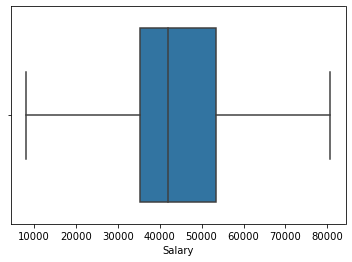

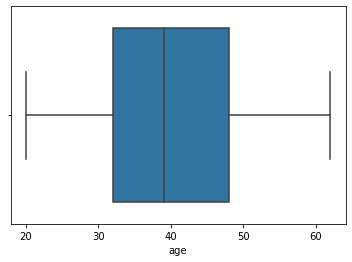

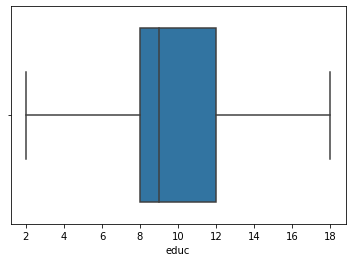

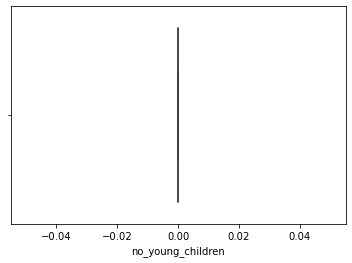

<AxesSubplot:xlabel='no_older_children'>

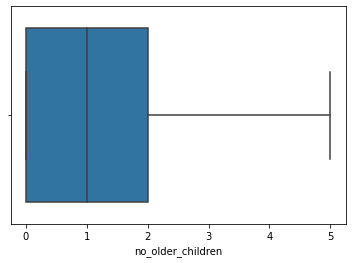

In [75]:
sns.boxplot(x='Salary', data=df1)
plt.show()
sns.boxplot(x='age', data=df1)
plt.show()
sns.boxplot(x='educ', data=df1)
plt.show()
sns.boxplot(x='no_young_children', data=df1)
plt.show()
sns.boxplot(x='no_older_children', data=df1)

In [76]:
X = df1.drop('Holliday_Package',axis=1)
Y = df1.pop('Holliday_Package')

In [77]:
X_train,X_test,Y_train,Y_test = model_selection.train_test_split(X,Y,test_size=0.30,random_state=1,stratify = Y)

In [78]:
#Building a LDA Model
clf = LinearDiscriminantAnalysis()
model=clf.fit(X_train,Y_train)

In [79]:
# Training data class Prediction, cut-off value = 0.5
pred_class_train = model.predict(X_train)

# Test data class Prediction, cut-off value = 0.5
pred_class_test = model.predict(X_test)

In [101]:
pred_class_train

array([1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,

In [100]:
pred_class_test

array([0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0],
      dtype=int8)

In [81]:
# Training data probability prediction
pred_prob_train = model.predict_proba(X_train)

In [82]:
# Test data probability prediction
pred_prob_test = model.predict_proba(X_test)

In [83]:
lda_train_acc = model.score(X_train,Y_train)
lda_train_acc

0.6327868852459017

**Classification report and confusion matrix of training data**

In [84]:
print(classification_report(Y_train, pred_class_train))

              precision    recall  f1-score   support

           0       0.62      0.80      0.70       329
           1       0.65      0.44      0.52       281

    accuracy                           0.63       610
   macro avg       0.64      0.62      0.61       610
weighted avg       0.64      0.63      0.62       610



In [85]:
confusion_matrix(Y_train, pred_class_train)

array([[263,  66],
       [158, 123]], dtype=int64)

**Classification report and confusion matrix of test data**

In [86]:
lda_test_acc = model.score(X_test,Y_test)
lda_test_acc

0.6564885496183206

In [87]:
print(classification_report(Y_test, pred_class_test))


              precision    recall  f1-score   support

           0       0.64      0.83      0.72       142
           1       0.69      0.45      0.55       120

    accuracy                           0.66       262
   macro avg       0.67      0.64      0.63       262
weighted avg       0.66      0.66      0.64       262



In [99]:
confusion_matrix(Y_test, pred_class_test)

array([[118,  24],
       [ 66,  54]], dtype=int64)

AUC for the Training Data: 0.661


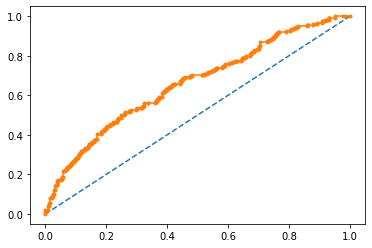

In [90]:
# AUC and ROC for the training data

# calculate AUC
lda_train_auc = metrics.roc_auc_score(Y_train,pred_prob_train[:,1])
print('AUC for the Training Data: %.3f' % lda_train_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_train,pred_prob_train[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label = 'Training Data')

AUC for the Test Data: 0.675


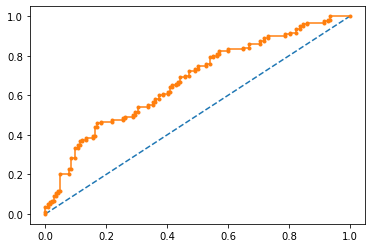

In [92]:
# AUC and ROC for the test data

# calculate AUC
lda_test_auc = metrics.roc_auc_score(Y_test,pred_prob_test[:,1])
print('AUC for the Test Data: %.3f' % lda_test_auc)

#  calculate roc curve
fpr, tpr, thresholds = metrics.roc_curve(Y_test,pred_prob_test[:,1])
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.',label='Test Data')

### Comparing the Linear Regression and Linear Discriminant Analysis (LDA) Models

**Precision, Recall and F1 Scores of Train and Test data of Linear Regression Model**

In [94]:
lr_metrics=classification_report(y_train, ytrain_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_train_f1=round(df.loc["1"][2],2)
lr_train_recall=round(df.loc["1"][1],2)
lr_train_precision=round(df.loc["1"][0],2)
print ('lr_train_precision ',lr_train_precision)
print ('lr_train_recall ',lr_train_recall)
print ('lr_train_f1 ',lr_train_f1)

lr_train_precision  0.65
lr_train_recall  0.45
lr_train_f1  0.53


In [95]:
lr_metrics=classification_report(y_test, ytest_predict,output_dict=True)
df=pd.DataFrame(lr_metrics).transpose()
lr_test_f1=round(df.loc["1"][2],2)
lr_test_recall=round(df.loc["1"][1],2)
lr_test_precision=round(df.loc["1"][0],2)
print ('lr_test_precision ',lr_test_precision)
print ('lr_test_recall ',lr_test_recall)
print ('lr_test_f1 ',lr_test_f1)

lr_test_precision  0.69
lr_test_recall  0.45
lr_test_f1  0.55


**Precision, Recall and F1 Scores of Train and Test data of Linear Discriminant Analysis (LDA) Model**

In [96]:
lda_metrics=classification_report(Y_train, pred_class_train,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_train_f1=round(df.loc["1"][2],2)
lda_train_recall=round(df.loc["1"][1],2)
lda_train_precision=round(df.loc["1"][0],2)
print ('lda_train_precision ',lda_train_precision)
print ('lda_train_recall ',lda_train_recall)
print ('lda_train_f1 ',lr_train_f1)

lda_train_precision  0.65
lda_train_recall  0.44
lda_train_f1  0.53


In [97]:
lda_metrics=classification_report(Y_test, pred_class_test,output_dict=True)
df=pd.DataFrame(lda_metrics).transpose()
lda_test_f1=round(df.loc["1"][2],2)
lda_test_recall=round(df.loc["1"][1],2)
lda_test_precision=round(df.loc["1"][0],2)
print ('lda_test_precision ',lda_test_precision)
print ('lda_test_recall ',lda_test_recall)
print ('lda_test_f1 ',lda_test_f1)

lda_test_precision  0.69
lda_test_recall  0.45
lda_test_f1  0.55


**Now let's compare the Linear Regression and Linear Discriminant Analysis (LDA) Models - based on their respective Precision, Recall and F1 Scores of Train and Test data**

In [98]:
index=['Accuracy', 'AUC', 'Recall','Precision','F1 Score']
data = pd.DataFrame({'LR Train':[lr_train_acc,lr_train_auc,lr_train_recall,lr_train_precision,lr_train_f1],
        'LR Test':[lr_test_acc,lr_test_auc,lr_test_recall,lr_test_precision,lr_test_f1],
       'LDA Train':[lda_train_acc,lda_train_auc,lda_train_recall,lda_train_precision,lda_train_f1],
        'LDA Test':[lda_test_acc,lda_test_auc,lda_test_recall,lda_test_precision,lda_test_f1],},index=index)
round(data,2)

,LR Train,LR Test,LDA Train,LDA Test
Accuracy,0.63,0.66,0.63,0.66
AUC,0.66,0.68,0.66,0.68
Recall,0.45,0.45,0.44,0.45
Precision,0.65,0.69,0.65,0.69
F1 Score,0.53,0.55,0.52,0.55


**Model Section:**
- LDA Model (When dealing with categorical independent variables, LDA is preferred.)

### Question - 2.4.  Inference: Basis on these predictions, what are the insights and recommendations

**Overview:**
- In this business case, a travel agency is looking for statistical evident predictions on employees likely to prefer to opt for the holiday package or not. The given dataset has information about the economic, behavioral, and age group. Based on the exploratory data analysis and models built, below are the business insights.

**Insights:**
- The comparison between the employee age range, salary, holiday package preference shows that the holiday package is preferred by employees salary range below 50,000.
- Employees' salaries ranging below 50,000 are of age range 30 -50. Hence, this age group has actively opted for the holiday package
- Employees aged over 50 to 60 have shown a tendency of not opting for the holiday package.
- On the other hand, employees with a salary of more than 150,000 are also not opting for the holiday package. This salary range has employees from both 30 - 50 and 50 - 60 age groups
- The holiday package is also not preferred by the employees having young children. 
- Employees with older children are opting for the package normally.
- We can see three major groups where strategy implementation is needed to grow the holiday package subscription:
- - Old age group - Employees aged between 50-60
- - Elite group - Salary range more than 150,000
- - Employees with small children

**Business Recommendations:**
- The business recommendation can be given based on the targeting segments created. Let's look into all these one by one:
- Old age group - Employees aged between 50-60
  - The holiday package of the holy-places (religious places) can be pitched to these folks
  - A survey asking their preferences, beliefs can help in creating a personalized package, which will have a high probability of acceptance
- Elite group - Salary range more than 150,000
  - This group would majorly prefer to have an experience-based holiday package. 
  - Looking at their salary range, they can be offered for abroad trip for the age group between 30 - 50. This package can have some personalized adventure or stay experience deal included
  - For the age group between 50 - 60, this package can have a family trip experience both domestic and international. This package can also have a whole trip experience with a personal local guide at a holy place.
- Employees with small children
  - These folks can be offered a trip to parks such as Disneyland (if higher salary range) or domestic parks as Wonderla,Queens Land, etc. (if low salary range)
  - Kids' special experiences such as live cartoon shows will be an add-on advantage in the package and increase the chance of opting for the package.
- Apart from these groups, families with older children can be offered a family holiday plan to keep up/continue their tendency of opting for the holiday packages. 
